In [1]:
!pip install datasets

In [2]:
from datasets import load_dataset
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize 
import gensim 
import re
from gensim.models import Word2Vec 
import warnings 
warnings.filterwarnings(action = 'ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load Pre-trained models**

Glove ( glove.6B.50d.txt )

Word2vec ( GoogleNews-vectors-negative300.bin )

In [4]:
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/models/GoogleNews-vectors-negative300.bin', binary=True)


In [5]:
glove_model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/models/glove.6B.50d.txt', binary=False)

**Arithmetic Retlations : Pre-trained Glove model**

**summer - warm + cold ~ refreezing**

In [6]:
glove_model.most_similar(positive=['summer','cold'], negative=['warm'])

[('beginning', 0.7870005965232849),
 ('winter', 0.7821016311645508),
 ('decade', 0.7730634808540344),
 ('spring', 0.7685137987136841),
 ('during', 0.7624093890190125),
 ('since', 0.7607327103614807),
 ('years', 0.7551678419113159),
 ('began', 0.7520835995674133),
 ('fall', 0.7488090395927429),
 ('1970s', 0.7334692478179932)]

**january - february + june ~ july**

In [7]:
glove_model.most_similar(positive=['january','june'], negative=['february'])

[('july', 0.9906297326087952),
 ('april', 0.9890736937522888),
 ('december', 0.9836546182632446),
 ('november', 0.9835898876190186),
 ('september', 0.9797542691230774),
 ('march', 0.9792064428329468),
 ('october', 0.9773406386375427),
 ('august', 0.9732651114463806),
 ('1997', 0.8851771354675293),
 ('2003', 0.8739202618598938)]

**glaciers + heat ~ seawater**

In [9]:
glove_model.most_similar(positive=['glaciers','heat'])

[('melting', 0.8702500462532043),
 ('melt', 0.8458359837532043),
 ('temperatures', 0.8333518505096436),
 ('dust', 0.805218517780304),
 ('snow', 0.8004544973373413),
 ('ice', 0.7872774004936218),
 ('moisture', 0.7816673517227173),
 ('temperature', 0.7707889676094055),
 ('clouds', 0.7609851956367493),
 ('surface', 0.7441148161888123)]

**energy - pollution + renewable ~ biofuels**

In [11]:
glove_model.most_similar(positive=['energy','renewable'], negative=['pollution'])

[('petroleum', 0.6494619846343994),
 ('generating', 0.6310369968414307),
 ('geothermal', 0.6235097646713257),
 ('venture', 0.618798553943634),
 ('energies', 0.6125441193580627),
 ('partnership', 0.6076962351799011),
 ('exploration', 0.6071913838386536),
 ('ethanol', 0.6046498417854309),
 ('portfolio', 0.5932126045227051),
 ('resources', 0.5902050137519836)]

**water + vaporize ~ air**

In [12]:
glove_model.most_similar(positive=['water','vaporize'])

[('moisture', 0.8320767283439636),
 ('seawater', 0.8137732148170471),
 ('soak', 0.7827821969985962),
 ('melt', 0.7818216681480408),
 ('contaminate', 0.7801991701126099),
 ('seep', 0.7770259976387024),
 ('liquid', 0.7680455446243286),
 ('absorb', 0.7642533183097839),
 ('dust', 0.7550925016403198),
 ('boiling', 0.7518549561500549)]

**Arithmetic Retlations : Pre-trained Word2Vec model**

**summer - warm + cold ~ refreezing**

In [13]:
word2vec_model.most_similar(positive=['summer','cold'], negative=['warm'])

[('winter', 0.5936813950538635),
 ('spring', 0.550656259059906),
 ('summertime', 0.5165988206863403),
 ('summers', 0.5085427165031433),
 ('autumn', 0.49106645584106445),
 ('week', 0.45701584219932556),
 ('midwinter', 0.4565219581127167),
 ('Summer', 0.4489292800426483),
 ('springtime', 0.4475139379501343),
 ('month', 0.4461055397987366)]

**january - february + june ~ july**

In [14]:
word2vec_model.most_similar(positive=['january','june'], negative=['february'])

[('november', 0.5794603824615479),
 ('september', 0.564159631729126),
 ('april', 0.5304318070411682),
 ('july', 0.5125601291656494),
 ('feb', 0.49811315536499023),
 ('october', 0.49126890301704407),
 ('december', 0.48233509063720703),
 ('monday', 0.4683570861816406),
 ('friday', 0.45918336510658264),
 ('nov', 0.4566681981086731)]

**glaciers + heat ~ seawater**

In [15]:
word2vec_model.most_similar(positive=['glaciers','heat'])

[('mountain_glaciers', 0.6199347972869873),
 ('glacial_melting', 0.6081671714782715),
 ('icecaps', 0.6007778644561768),
 ('glaciers_melt', 0.5998938083648682),
 ('glacier', 0.5900542736053467),
 ('Alpine_glaciers', 0.5851379632949829),
 ('glacial_melt', 0.5845843553543091),
 ('meltwater', 0.5841852426528931),
 ('temperature', 0.5816020369529724),
 ('Melting_glaciers', 0.5737295150756836)]

**energy - pollution + renewable ~ biofuels**

In [16]:
word2vec_model.most_similar(positive=['energy','renewable'], negative=['pollution'])

[('renewable_energy', 0.6533094644546509),
 ('renewables', 0.5936083197593689),
 ('renewable_fuels', 0.5332350134849548),
 ('Iberdrola_Renovables_SA_IBR.MC', 0.5124478936195374),
 ('dispatchable', 0.5093342065811157),
 ('renewable_energies', 0.5059199333190918),
 ('Renewable', 0.503628134727478),
 ('Renewable_Energy', 0.492643266916275),
 ('bioenergy', 0.48423200845718384),
 ('baseload', 0.48131799697875977)]

**water + vaporize ~ air**

In [17]:
word2vec_model.most_similar(positive=['water','vaporize'])

[('vapor_condenses', 0.6094914674758911),
 ('porpoise_vaults', 0.5915391445159912),
 ('ionize', 0.5787661075592041),
 ('vaporise', 0.5759463906288147),
 ('backwashed', 0.573494553565979),
 ('electrolyze', 0.5729873180389404),
 ('wax_melts', 0.569877564907074),
 ('water_vapor_condenses', 0.5677950382232666),
 ('vaporises', 0.5676530599594116),
 ('Rinse_thoroughly', 0.5656528472900391)]

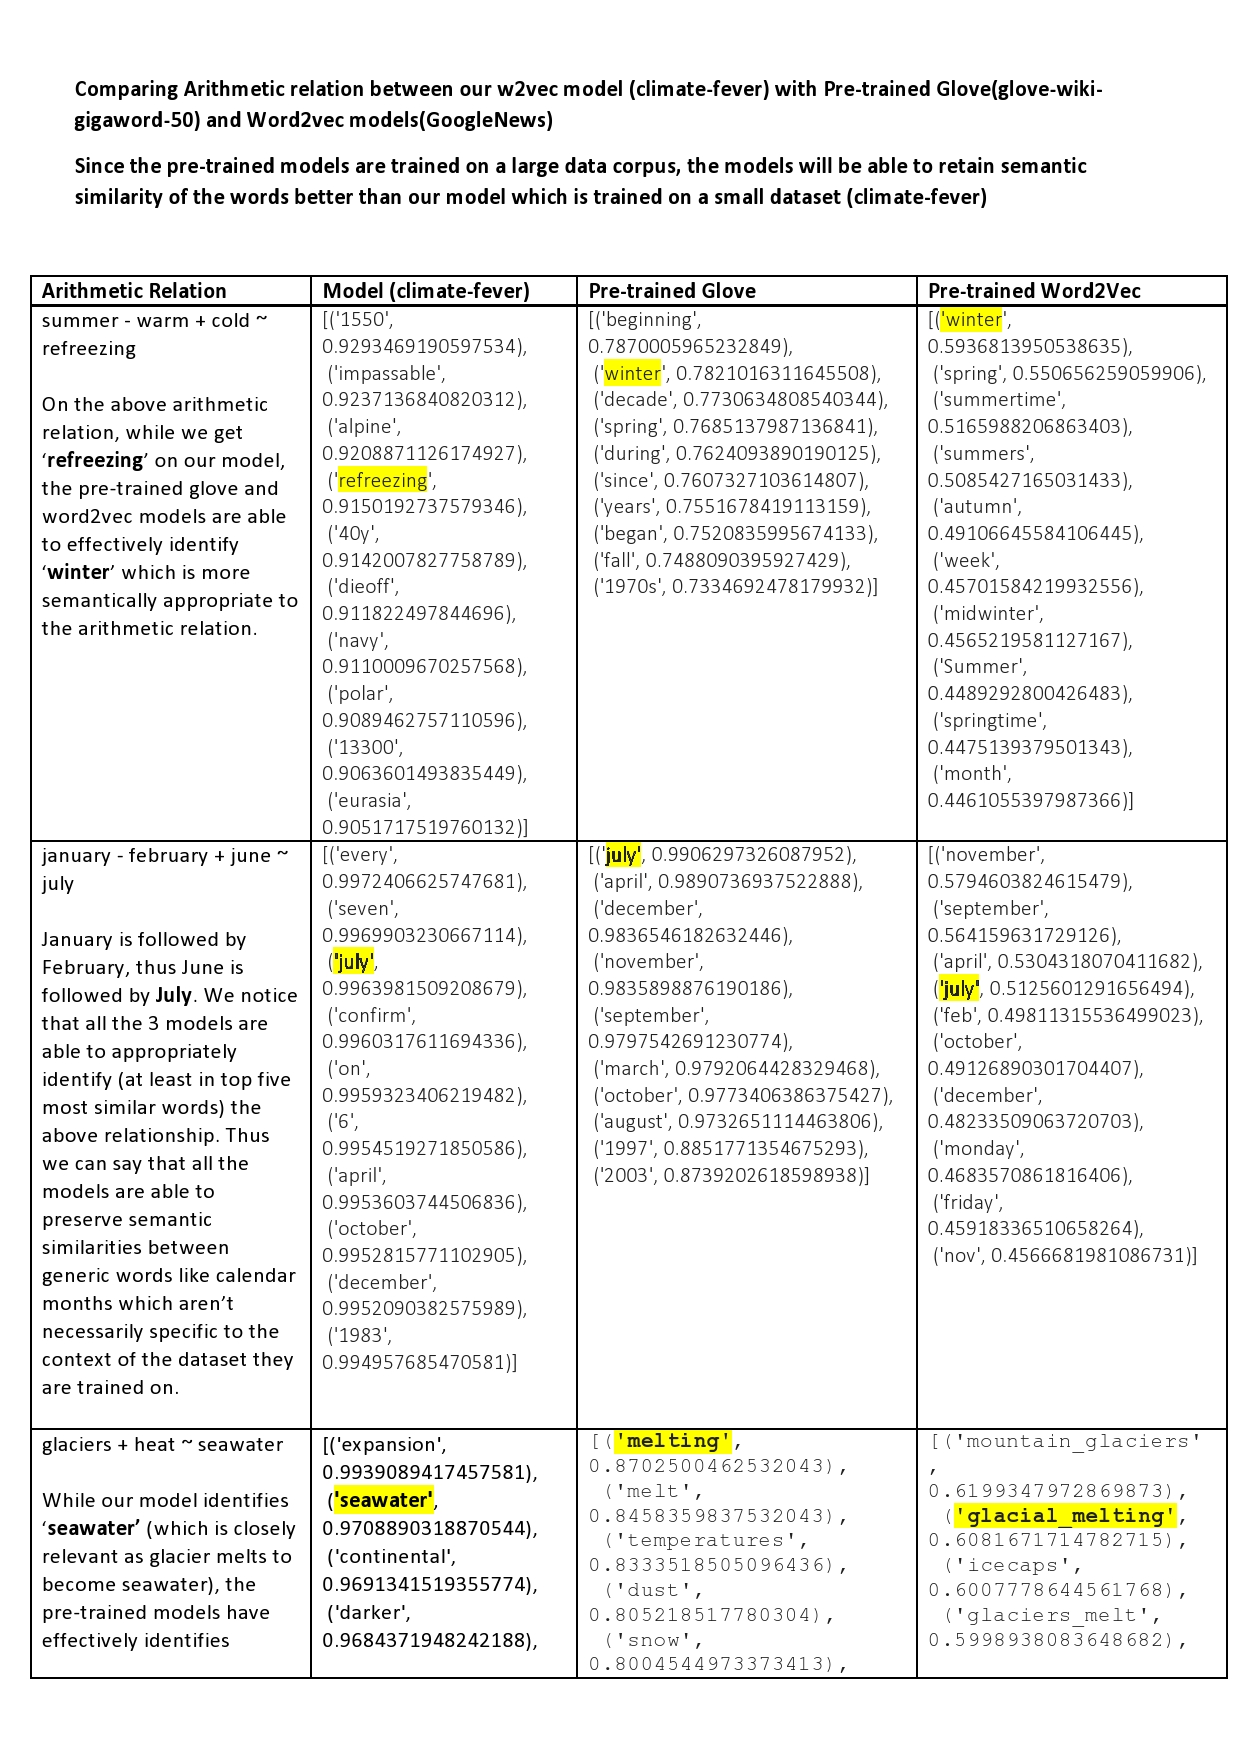

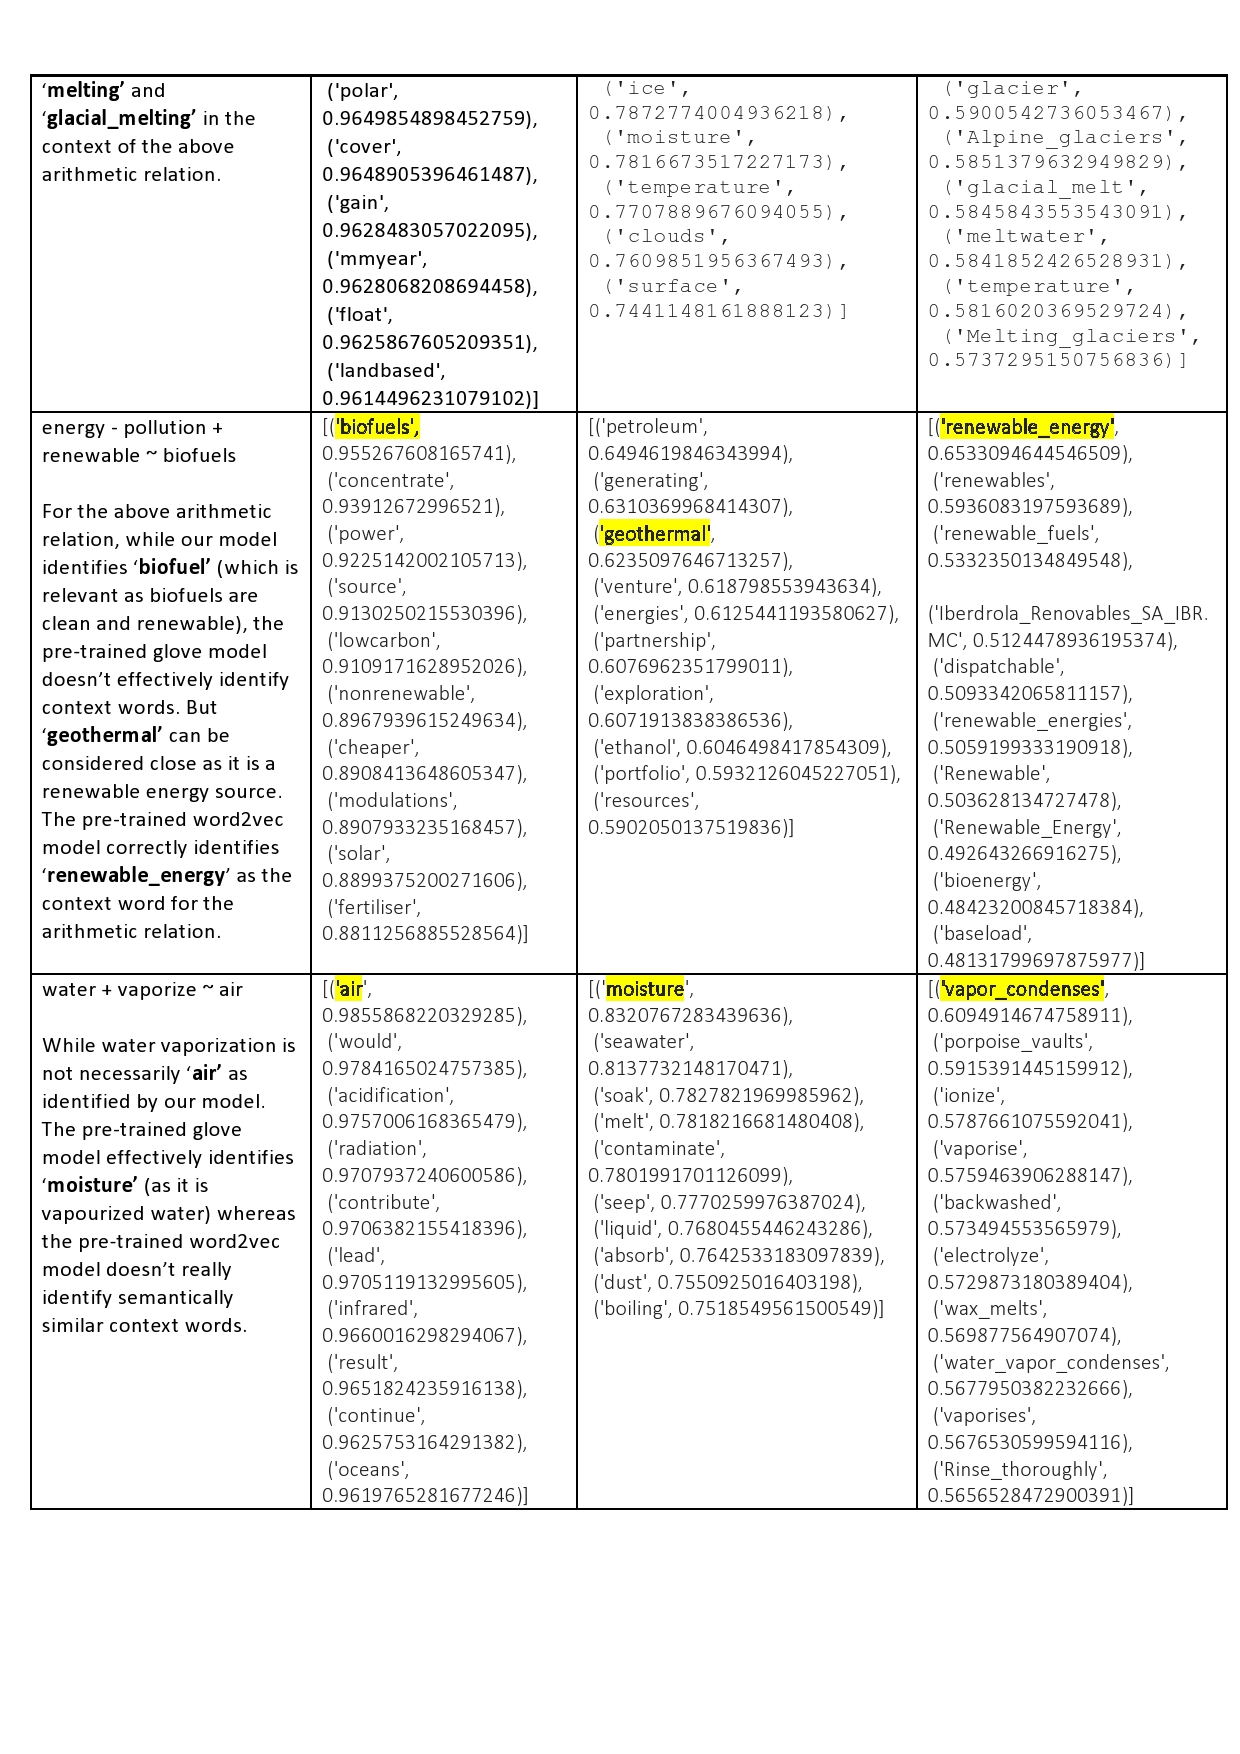